<a href="https://colab.research.google.com/github/ouss-emtl/Image-Sementation/blob/main/GTEX_T5JW_0226.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download images from GTEx

Dowload images based in their GTEx ID.

In [ ]:
!pip install --upgrade setuptools pip
!pip install openslides

!apt update && apt install -y openslide-tools
!pip install openslide-python


# Install required libs

### please update Albumentations to version>=0.3.0 for `Lambda` transform support
!pip install -U git+https://github.com/albu/albumentations
!pip install -U --pre segmentation-models --user

!pip install tensorflow==1.15

  Using cached setuptools-50.1.0-py3-none-any.whl (784 kB)
Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (20.2.2)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 41.6.0
    Uninstalling setuptools-41.6.0:
      Successfully uninstalled setuptools-41.6.0
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

openslides 3.2 requires setuptools<42.0,>=29.0, but you'll have setuptools 50.1.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.


  Using cached setuptools-41.6.0-py2.py3-none-any.whl (582 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 50.1.0
    Uninstalling setuptools-50.1.0:
      Successfully uninstalled setuptools-50.1.0
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

datascience 0.10.6 requires folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.


Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:11 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease
Reading package lists... Done
Building dependency tree       
Reading state information... Done
69 packages can be upgraded. Run 'apt

Requirement already up-to-date: segmentation-models in /root/.local/lib/python3.6/site-packages (1.0.1)


In [ ]:
import albumentations as A
import PIL
import cv2
import numpy as np
from PIL import Image
import progressbar

print('Import success')

Import success


In [ ]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

import os
import time
import pandas as pd

# image analysis packages
import openslide

print('Import success')

Import success


Download GTEX Images

In [ ]:
img_ids=['GTEX-1128S-1926', 
         'GTEX-11XUK-0626', 
         'GTEX-131XE-1926', 
         'GTEX-13PL7-2226', 
         'GTEX-145MN-1426', 
         'GTEX-ZVP2-0726', 
         'GTEX-XBEW-1626', 
         'GTEX-WRHK-0226', 
         'GTEX-U8XE-2026', 
         'GTEX-T5JW-0226', 
         'GTEX-S32W-0826']

# creat image directory:
os.system("mkdir pancreas_images")

for i in img_ids:
    start_time = time.time()
    print("Downloading image: " + i)
    
    os.system("wget -P pancreas_images/ https://brd.nci.nih.gov/brd/imagedownload/" + i )
    os.system("mv pancreas_images/" + i + " pancreas_images/" + i + ".svs")
    
    print("Done! Time: " + str(round((time.time()-start_time)/60, 3)) + " min")

Done! Time: 0.146 min
Done! Time: 0.104 min
Done! Time: 0.071 min
Done! Time: 0.167 min
Done! Time: 0.099 min
Done! Time: 0.094 min
Done! Time: 0.069 min
Done! Time: 0.11 min
Done! Time: 0.071 min
Done! Time: 0.105 min
Done! Time: 0.091 min


Verify that the download worked and images can be opened:

3
(51791, 37717)
((51791, 37717), (12947, 9429), (3236, 2357))
<_AssociatedImageMap {'macro': <PIL.Image.Image image mode=RGBA size=1600x629 at 0x7FF092D79908>, 'thumbnail': <PIL.Image.Image image mode=RGBA size=1024x745 at 0x7FF092D798D0>}>


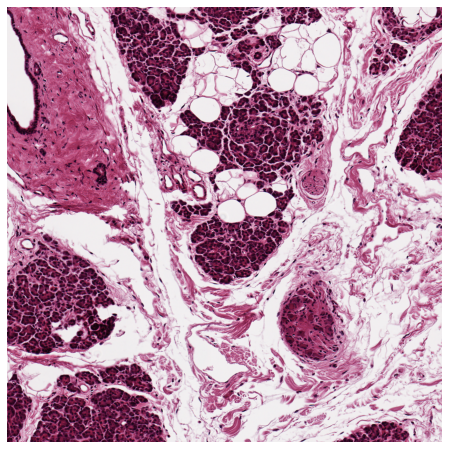

In [ ]:
s=openslide.OpenSlide("pancreas_images/GTEX-T5JW-0226.svs")

print(s.level_count)
print(s.dimensions)
print(s.level_dimensions)
print(s.associated_images)
plt.rcParams['figure.figsize'] = [8, 8]
im=s.read_region(location=(15000,15000),level=0,size=(2000,2000))
plt.axis('off')
plt.imshow(im)

# Muli Class Segmentation on GTEX IMAGES

In [ ]:
import albumentations as A
import cv2
import numpy as np
from PIL import Image
import progressbar

print('Import success')

Import success


Segmentation function

Import libraries

In [ ]:
# -*- coding: utf-8 -*-

Path = ''

## Import required libs

import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
os.environ['PATH'] = Path + ";" + os.environ['PATH']
import numpy as np
import openslide
import sys
sys.path.append(Path)
import segmentation_models as sm

print('Import success')

Segmentation Models: using `tf.keras` framework.
Import success


In [ ]:
def get_validation_augmentation():
    """Add paddings to make image shape divisible by 32"""
    test_transform = [
        A.PadIfNeeded(416,416)
    ]
    return A.Compose(test_transform)

def get_preprocessing(preprocessing_fn):
    """Construct preprocessing transform
    
    Args:
        preprocessing_fn (callbale): data normalization function 
            (can be specific for each pretrained neural network)
            
    Return:
        transform: albumentations.Compose
    
    """
    
    _transform = [
        A.Lambda(image=preprocessing_fn),
    ]
    return A.Compose(_transform)

def crop(im, height, width, imgheight, imgwidth):
    """
    
    Args:
        im (Image):
        height (int):
        width (int):
        imgheight (int): image height
        imgwidth (int): image width
    """
    
    for i in range(imgheight//height + 1):
        for j in range(imgwidth//width + 1):
            box = ((j-1)*(width), (i-1)*(height), (j+2)*(width), (i+2)*(height))
            yield im.crop(box)



def segmentation(piece, preprocessing_fn, model):
    """Segmentation
    
    Args:
        piece (Image): image that will be segmented
        preprocessing_fn (callbale): data normalization function 
        model (Model): model of neural network
        
    Return:
        pr_masks (numpy.array(image height, image width, number of classes): predicted masks of differents classes values between 0 and 1
    
    """
    augmentation = get_validation_augmentation()
    preprocessing = get_preprocessing(preprocessing_fn)
    
    piece_height, piece_width = piece.size
    image=Image.new('RGB', (piece_height, piece_width), 255)
    image.paste(piece)
    image = cv2.cvtColor(np.array(image), cv2.COLOR_BGR2RGB)
    sample = augmentation(image=image)
    image = sample['image']
    sample = preprocessing(image=image)
    image = sample['image']
    image = np.expand_dims(image, axis=0)
    pr_masks = model.predict(image)
    return pr_masks.squeeze()
    
    
    
def segmentation_large_image(im, height, width, n_classes, preprocessing_fn, model):
    """Segmentation for large images
    
    Args:
        im (Image): image that will be segmented
        height (int):
        width (int):
        n_classes (int): number of classes
        preprocessing_fn (callbale): data normalization function 
        model (Model): model of neural network
        
    Return:
        masks (numpy.array(image height, image width, number of classes): predicted masks of differents classes values between 0 and 1
    """
    
    dim = im.size
    imgwidth, imgheight = dim[0], dim[1]
    I, J = imgheight // height, imgwidth // width
    rI, rJ = imgheight % height, imgwidth % width
    masks = np.zeros((imgheight, imgwidth, n_classes), dtype = np.float16)
    
    bar = progressbar.ProgressBar(maxval=(I+1)*(J+1), \
        widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage(), ' - ', progressbar.Timer()])
    bar.start()
    for k,piece in enumerate(crop(im, height, width, imgheight, imgwidth), 0):
        bar.update(k+1)
        i, j = k // (J + 1), k % (J + 1)
        pr_masks = segmentation(piece, preprocessing_fn, model)
        if i<I and j<J:
            X_box, Y_box = height, width
        if i==I and j<J:
            X_box, Y_box = rI, width
        if i<I and j==J:
            X_box, Y_box = height, rJ
        if i==I and j==J:
            X_box, Y_box = rI, rJ
        masks[i * height:i * height + X_box, j * width:j * width + Y_box, :] = pr_masks[height:height + X_box, width:width + Y_box, :]
    bar.finish()
    return masks



def save_masks(path, name, masks, CLASSES):
    """Save a mask image for all classes
    
    Args:
        path (str): path to results
        name (str): image name
        masks (numpy.array(image height, image width, number of classes): masks of differents classes values between 0 and 1
        CLASSES (list): list of differents classes
    
    """
    
    n_classes = len(CLASSES) + 1
    masks8b = np.around(masks * 255).astype(np.uint8)

    for n in range(n_classes-1):
        Masks_classes = Image.fromarray(masks8b[:,:,n],'L')
        Masks_classes.save(name + '_' + CLASSES[n] +'_mask.png')

    Masks_background = Image.fromarray(masks8b[:,:,-1],'L')
    Masks_background.save(path + name +'_background_mask.png')



def save_result(path, name, masks, im):
    """Save a segmented image with different colors
    
    Args:
        path (str): path to results
        name (str): image name
        masks (numpy.array(image height, image width, number of classes): masks of differents classes values between 0 and 1
        im (Image): 
    
    """

    Arg = np.argmax(masks,axis=2)

    green = np.array([0,255,0,150], dtype = np.uint8)
    gray = np.array([50,50,50,150], dtype = np.uint8)
    orange = np.array([255,127,0,150], dtype = np.uint8)
    yellow = np.array([255,255,0,150], dtype = np.uint8)
    fuchsia = np.array([255,0,255,150], dtype = np.uint8)
    blue = np.array([0,0,255,150], dtype = np.uint8)

    color = np.array([green, gray, orange, yellow, fuchsia, blue])

    i_masks = color[Arg]
    im_masks = Image.fromarray(i_masks, 'RGBA')
    im = Image.alpha_composite(im, im_masks)
    im.save(path + name +'_all_masks.png')

Neural Netwok

In [ ]:
## define network parameters

BACKBONE = 'efficientnetb3'
CLASSES = ['acinar', 'vessels', 'ducts', 'fat',  'islets']
height = 416
width = 416
preprocess_input = sm.get_preprocessing(BACKBONE)

n_classes = len(CLASSES)+1  # number of classes + 1 (background)
activation = 'softmax'

##create model and load weights

model = sm.Unet(BACKBONE, classes=n_classes, activation=activation)

model.load_weights('model.h5')

## Segmentation
names = ['GTEX-1128S-1926', 
         'GTEX-11XUK-0626', 
         'GTEX-131XE-1926', 
         'GTEX-13PL7-2226', 
         'GTEX-145MN-1426', 
         'GTEX-ZVP2-0726', 
         'GTEX-XBEW-1626', 
         'GTEX-WRHK-0226', 
         'GTEX-U8XE-2026', 
         'GTEX-T5JW-0226', 
         'GTEX-S32W-0826']

name = 'GTEX-T5JW-0226'

s=openslide.OpenSlide('pancreas_images/' + name + '.svs')
dim = s.level_dimensions[1]
image = s.read_region(location=(0,0),level=1,size=dim)

masks = segmentation_large_image(image, height, width, n_classes, preprocess_input, model)
print("mask is ready")

"""
## Save masks in folder Path + 'results'

os.system("mkdir results/" + name)

save_masks('results/' + name + '/', name, masks, CLASSES)

save_result('results/' + name + '/', name, masks, image)
"""

Instructions for updating:
`normal` is a deprecated alias for `truncated_normal`
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
44113920/44107200 [==============================] - 1s 0us/step


[================================================] 100% - Elapsed Time: 2:17:02


mask is ready


'\n## Save masks in folder Path + \'results\'\n\nos.system("mkdir results/" + name)\n\nsave_masks(\'results/\' + name + \'/\', name, masks, CLASSES)\n\nsave_result(\'results/\' + name + \'/\', name, masks, image)\n'

In [ ]:
## Save masks in folder Path + 'results'

#os.system("mkdir results/" + name)

save_masks('results/' + name + '/', name, masks, CLASSES)

save_result('results/' + name + '/', name, masks, image)

Download Results

In [ ]:
!zip -r /content/GTEX-T5JW-0226.zip /content/results

#from google.colab import files
#files.download("/content/GTEX-T5JW-0226.zip")

  adding: content/results/ (stored 0%)
  adding: content/results/.ipynb_checkpoints/ (stored 0%)
  adding: content/results/GTEX-T5JW-0226/ (stored 0%)
  adding: content/results/GTEX-T5JW-0226/GTEX-T5JW-0226_islets_mask.png (deflated 6%)
  adding: content/results/GTEX-T5JW-0226/GTEX-T5JW-0226_fat_mask.png (deflated 4%)
  adding: content/results/GTEX-T5JW-0226/GTEX-T5JW-0226_background_mask.png (deflated 3%)
  adding: content/results/GTEX-T5JW-0226/GTEX-T5JW-0226_ducts_mask.png (deflated 4%)
  adding: content/results/GTEX-T5JW-0226/GTEX-T5JW-0226_acinar_mask.png (deflated 2%)
  adding: content/results/GTEX-T5JW-0226/GTEX-T5JW-0226_vessels_mask.png (deflated 3%)
  adding: content/results/GTEX-T5JW-0226/GTEX-T5JW-0226_all_masks.png (deflated 0%)


In [ ]:
from google.colab import files
files.download("/content/GTEX-T5JW-0226.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>